# AI Lab Assignment 4

## 3. Text processing and unbalanced data (3 points)

In [72]:
import pandas as pd

df = pd.read_csv("train.tsv", sep='\t', index_col="PhraseId")
pd.set_option('display.max_colwidth', None)
df.head(2)

,SentenceId,Phrase,Sentiment
PhraseId,,,
1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
2,1,A series of escapades demonstrating the adage that what is good for the goose,2


We will use a dataset to predict the sentiment of some text from tagged phrases.
Labels for sentiments are:

* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

More information [here](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews).


Throughout this exercise we will see different ways of processing the text and balancing the classes to be learned.

In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[["Phrase", "Sentiment"]], random_state=0)
X_train = train.Phrase
X_test = test.Phrase
y_train = train.Sentiment
y_test = test.Sentiment

**Basic Models**

We are going to start with a *pipe* of very basic models and see if they have any issues.

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

count_vectorizer = CountVectorizer(max_features=1000)
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
pipe = make_pipeline(count_vectorizer,decision_tree)

In [75]:
from sklearn.metrics import accuracy_score

def get_accuracy(pipe):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return round(accuracy_score(y_pred, y_test),3)

In [89]:
get_accuracy(pipe)

0.515

Let's see which classes are actually being predicted

In [ ]:
# Training labels
round(pd.Series(y_train).value_counts(normalize=True),2)

2    0.51
3    0.21
1    0.17
4    0.06
0    0.04
Name: Sentiment, dtype: float64

In [ ]:
# Predicted classes
y_pred = pipe.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.97
3    0.03
dtype: float64

That is: being an unbalanced problem, the prediction is clearly biased towards one of the classes.

This can also be seen by analyzing the **confusion matrix**

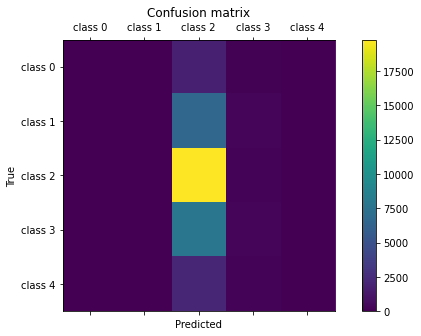

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(pipe):
    ticks = np.unique(y_test)
    labels = [('class '+ str(tick)) for tick in ticks]
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(pipe)

## Changing models and data processing

Analyze if any of the other models seen in previous exercises avoid this problem of unbalanced classes.

For example, in the following cell we changed the decision tree classifier and used a KNN instead.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
pipe_knn = make_pipeline(count_vectorizer,knn)
get_accuracy(pipe_knn)

0.564

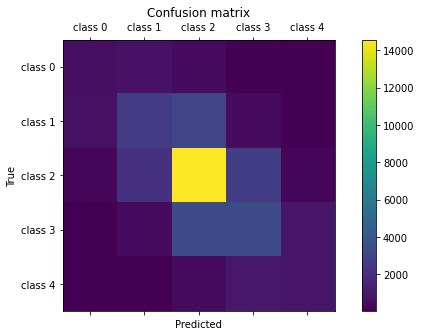

In [ ]:
plot_confusion_matrix(pipe_knn)

In [ ]:
# Predicted classes
y_pred = pipe_knn.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.56
3    0.19
1    0.15
4    0.05
0    0.04
dtype: float64

### Explore multiple models and answer the following questions:

* Which model gives the best results?
* Are there any parameters of the models that are particularly effective in avoiding imbalance?

Note: include as many cells as you need to show the code you used to answer these questions.

#### Random forest Classifier Model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clsf = RandomForestClassifier(n_estimators=100, random_state=0)
pipe_rfc = make_pipeline(count_vectorizer,clsf)
get_accuracy(pipe_rfc)

0.606

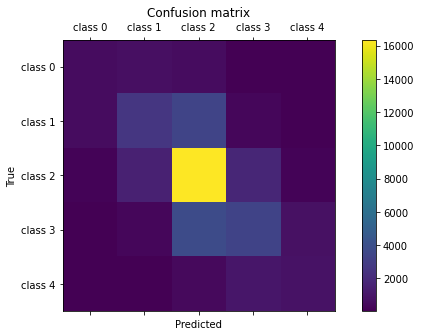

In [ ]:
plot_confusion_matrix(pipe_rfc)

In [ ]:
# Predicted classes
y_pred = pipe_rfc.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.63
3    0.16
1    0.13
4    0.04
0    0.03
dtype: float64

#### MLP Classifier:

In [ ]:
from sklearn.neural_network import MLPClassifier
#Different parameters tested
#mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1500, alpha=0.0)
mlp = MLPClassifier(hidden_layer_sizes=(10),
                            max_iter=1500,
                            alpha=0.0)
pipe_mlp = make_pipeline(count_vectorizer,mlp)
get_accuracy(pipe_mlp)

0.603

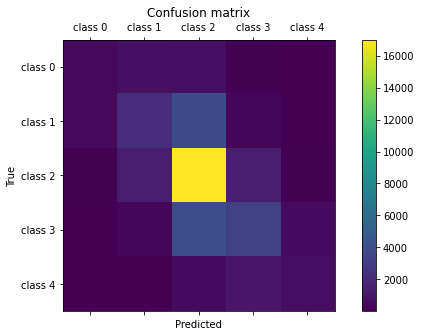

In [ ]:
plot_confusion_matrix(pipe_mlp)

In [ ]:
# Predicted classes
y_pred = pipe_mlp.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.67
3    0.16
1    0.12
4    0.03
0    0.02
dtype: float64

* Which model gives the best results?

Analysing these classifier models we can see that there is a small change in the accuracy of the model but the biasness of the model towards a class is way lesser in KNN than in Decision Tree Model.

Similarly, we test two other models with a general guess of the parameters: Random forest & MLP classifier. For both these models the accuracy remains relatively similar, However, **Random Forest model** provides the lowest biasness for this unbalanced data.

* Are there any parameters of the models that are particularly effective in avoiding imbalance?

For example, we show below that for MLP classifier, increasing the hidden layers or neurons will decrease bias as the model becomes more complex. Similarly, we also show using code that in the case of KNN, increasing K will result in increase in bias as the model becomes more complex. In the case of Decision trees, increasing the max depth results in increase in model's complexity which results in less bias. Therefore, the hyperparameters can play an integral role in avoiding imbalance. Finding the right balance, using grid search, can be effective.

In [ ]:
from sklearn.neural_network import MLPClassifier
#Different parameters tested
mlp2 = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1500, alpha=0.0)
pipe_mlp2 = make_pipeline(count_vectorizer,mlp2)
get_accuracy(pipe_mlp2)

0.595

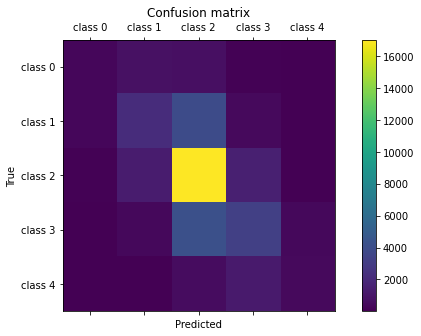

In [ ]:
plot_confusion_matrix(pipe_mlp2)

In [ ]:
# Predicted classes
y_pred = pipe_mlp2.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.67
3    0.17
1    0.12
4    0.02
0    0.02
dtype: float64

In [ ]:
from sklearn.neural_network import MLPClassifier
#Different parameters tested
mlp3 = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=1500, alpha=0.0)
pipe_mlp3 = make_pipeline(count_vectorizer,mlp3)
get_accuracy(pipe_mlp3)

0.597

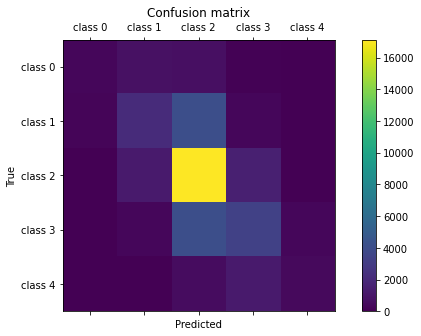

In [ ]:
plot_confusion_matrix(pipe_mlp3)

In [ ]:
# Predicted classes
y_pred = pipe_mlp3.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.68
3    0.16
1    0.12
4    0.02
0    0.02
dtype: float64

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
pipe_knn2 = make_pipeline(count_vectorizer,knn2)
get_accuracy(pipe_knn2)


0.572

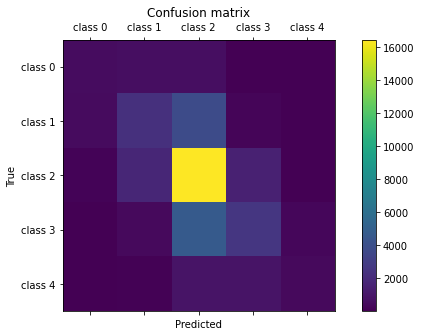

In [ ]:
plot_confusion_matrix(pipe_knn2)

In [ ]:
# Predicted classes
y_pred = pipe_knn2.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.68
3    0.14
1    0.13
0    0.03
4    0.02
dtype: float64

### Data Processing

The first step used in the *pipe* above is very simple: it counts how many times each term appears. Also, it has been limited to a maximum of 1000 dimensions. Try other ways of processing the text and discuss the differences. 

As an example, the following cell uses a method that considers the frequency of terms ([TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) ). The documentation shows that it allows several configurations (removing accents, changing to lowercase, performing more complex transformations, removing common words, etc.).

0.605


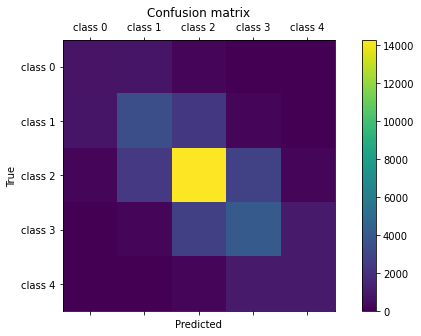

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
pipe_tfidf = make_pipeline(tfidf_vectorizer, knn)
print(get_accuracy(pipe_tfidf))
plot_confusion_matrix(pipe_tfidf)

In [ ]:
# Predicted classes
y_pred = pipe_tfidf.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.51
3    0.21
1    0.18
4    0.06
0    0.05
dtype: float64

Try various classifiers and settings for text processing and answer the following questions:

* According to your experiments, which processing step has the greatest effect on the results: the classifier or the text processing?
* Have you found any type of processing that always improves the results? What hypothesis would you propose to explain this behavior?

0.606


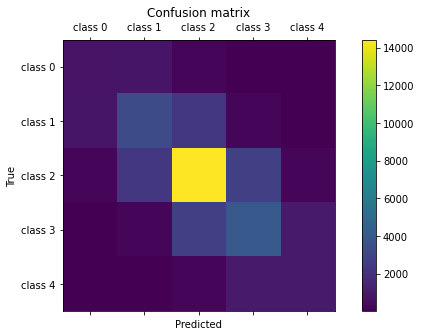

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1,3))
pipe_tfidf1 = make_pipeline(tfidf_vectorizer1, knn)
print(get_accuracy(pipe_tfidf1))
plot_confusion_matrix(pipe_tfidf1)

In [ ]:
# Predicted classes
y_pred = pipe_tfidf1.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.51
3    0.21
1    0.17
4    0.06
0    0.05
dtype: float64

0.595


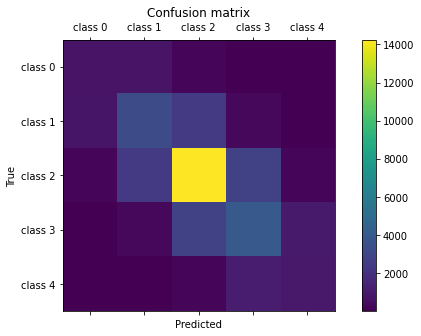

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words="english")
pipe_tfidf2 = make_pipeline(tfidf_vectorizer2, knn)
print(get_accuracy(pipe_tfidf2))
plot_confusion_matrix(pipe_tfidf2)

0.595


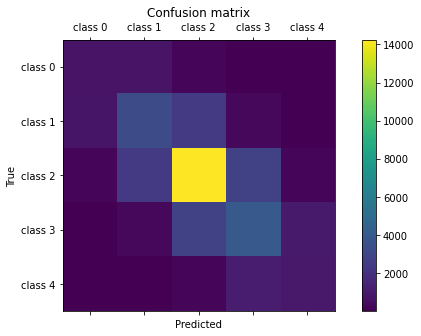

In [87]:
tfidf_vectorizer3 = TfidfVectorizer(strip_accents='ascii', stop_words="english")
pipe_tfidf3 = make_pipeline(tfidf_vectorizer3, knn)
print(get_accuracy(pipe_tfidf3))
plot_confusion_matrix(pipe_tfidf3)

0.595


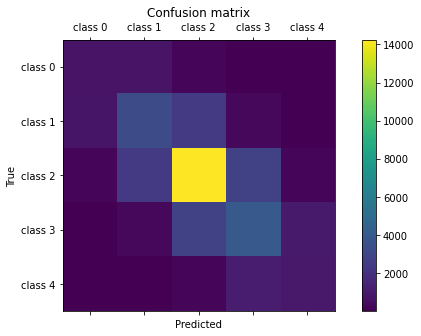

In [ ]:
# remove words occuring in more than half the documents
tfidf_vectorizer4 = TfidfVectorizer(max_df=0.5,stop_words="english")
pipe_tfidf4 = make_pipeline(tfidf_vectorizer4, knn)
print(get_accuracy(pipe_tfidf4))
plot_confusion_matrix(pipe_tfidf4)


0.54


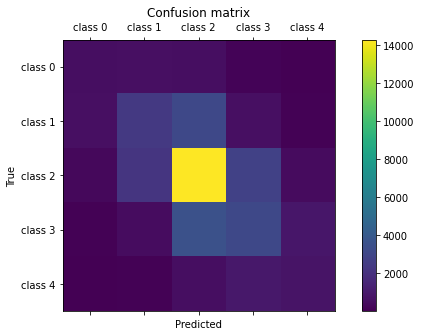

In [ ]:
tfidf_vectorizer5 = TfidfVectorizer(max_features = 300)
pipe_tfidf5 = make_pipeline(tfidf_vectorizer5, knn)
print(get_accuracy(pipe_tfidf5))
plot_confusion_matrix(pipe_tfidf5)

#### Pre-Processing (Different Way):

In [120]:
import nltk
from keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [121]:
def TextPreprocessing(text):
    text=str(text)
    text = text.replace("'","")                                                                                 #remove '
    tokenized_train_data = text_to_word_sequence(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=" ") #Filters and convert to tokens
    #Remove stop words of English
    stop_words = set(stopwords.words('english'))                                                                
    stopwordremove = [i for i in tokenized_train_data if not i in stop_words]
    stopwordremove_text = ' '.join(stopwordremove)
    numberRemove = ''.join(num for num in stopwordremove_text if not num.isdigit())
    #Return tokenized copy of the text
    stemmer = PorterStemmer()
    stem_input = nltk.word_tokenize(numberRemove)
    stem_text = ' '.join([stemmer.stem(word) for word in stem_input])
    return stem_text

In [126]:
train_df = df[['Phrase','Sentiment']]
train_df['Phrase'] = train_df['Phrase'].apply(TextPreprocessing)
train_df['Phrase'].replace('',np.nan,inplace =True)
train_df.dropna(subset = ['Phrase'],inplace =True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5804\1912734439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Phrase'] = train_df['Phrase'].apply(TextPreprocessing)
C:\Users\Hp\AppData\Local\Temp\ipykernel_5804\1912734439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Phrase'].replace('',np.nan,inplace =True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_5804\1912734439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [127]:
train2, test2 = train_test_split(df[["Phrase", "Sentiment"]], random_state=0)
X_train2 = train2.Phrase
X_test2 = test2.Phrase
y_train2 = train2.Sentiment
y_test2 = test2.Sentiment

In [128]:
tfidf_vectorizer_pp = TfidfVectorizer()
pipe_tfidf_pp = make_pipeline(tfidf_vectorizer_pp, knn)
pipe_tfidf_pp.fit(X_train2, y_train2)
y_pred = pipe_tfidf_pp.predict(X_test)
round(accuracy_score(y_pred, y_test),3)

0.605

In [129]:
# Predicted classes
y_pred = pipe_tfidf_pp.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.51
3    0.21
1    0.18
4    0.06
0    0.05
dtype: float64

* **According to your experiments, which processing step has the greatest effect on the results: the classifier or the text processing?**
    
    
    The text processing has the greater effect on the result, as can be seen by our experiment's confusion matrix. This is because the parameter tuning is highly effective in making sure that biasness is decreased from the model.

* **Have you found any type of processing that always improves the results? What hypothesis would you propose to explain this behavior?**


    **STOP WORDS:**
    Stop words include words like "and," "the," and "to" in English, as well as pronouns and prepositions. This procedure filters out highly common phrases that seem to add little to no value, so removing widespread and frequent terms that are uninformative of the relevant text. Stop words can be securely disregarded, freeing up database space and speeding up processing, Hence almost always improvind the results.

    **NGRAM_RANGE:**
    The lower and upper boundary of the range of n-values for different n-grams to be extracted. An N-Gram is a sequence of N-words in a sentence. We give the lower bound as 1 while keeping the upper bound at 3. This means that providing context to the words is essential and will help us improve results.

    **MAX_FEATURES:**
    This builds a vocabulary that only consider the top max_features ordered by term frequency across the corpus. This narrows the decision down and provides a more accurate and decisive model, improving the results as can be seen by it's confusion matrix.



## Conclusions
**Summarize the results and conclusions of your study.**

To summarise the results, We can note that different models of classification have different affects on the biasness and the accuracy of the unbalanced dataset. These variations are also dependent on the hyperparameters of the classification models which can be fine tuned to reduce biasness and increase the accuracy. However, For Sentiment Analysis with Text processing which is our case, Mostly the accuracy and reduction in bias is dependent on the preprocessing of the text which is essential. TfidfVectorizer() has alot of potential parameters that help us process the text in different ways to adapt to our model and remove useless information whilst focusing on the important text only. We can also do the preprocessing manually using many different tools such as tokenizers and filters.